# Numpy and Pandas

## Objectives: 

- Use numpy.random to generate a dataset.
- Read in various forms of data into a panadas dataframe
- Perform some basic operations on the dataframe 

## Agenda

- Review Numpy
- Introduce Pandas
- Reading in data and merging dataframes (DF)
- working with missing values
- Slicing, selecing and xxtracting data

## Numpy

- There is nothing in NumPy which can’t be done via python lists or by using other data structures.
- NumPy provides an efficient storage and better way handling of the data for mathematical operations using simple API’s.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
# Create an array of 25 numbers between -1 and 1
pure = np.linspace(-1, 1, 25)

In [3]:
pure

array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
       -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
       -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
        0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
        0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ])

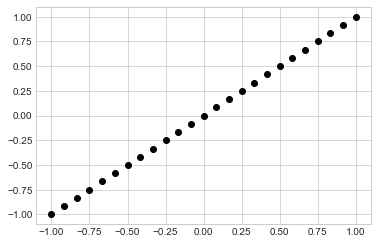

In [7]:
# Create a scatterplot where the x and y both refer to the array created above
plt.plot(pure, pure, 'o', color='black');


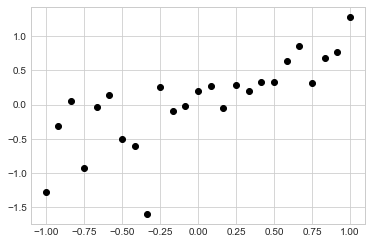

In [8]:
#Add some noise to the data by randomly generating numbers between 0 and .5 to add to the Ys
noise = np.random.normal(0, .5, pure.shape, )
signal = pure + noise
plt.plot(pure, signal, 'o', color='black');


In [9]:
# Graph a log transformation of the numbers
np.random.seed(1234)
pure = np.linspace(0, 10000, 50)
noise = np.random.normal(-.2, .2, pure.shape)
y = np.log(pure)
signal = y + noise

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


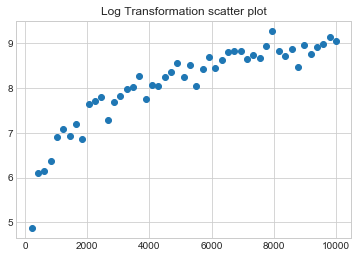

In [10]:
# Create plot
fig, ax = plt.subplots()
ax.scatter(pure, signal)
ax.set_title('Log Transformation scatter plot')

plt.show()

**Use a numpy function to transform the `pure` data series and then create your own scatterplot of the new data with the `pure` data.**


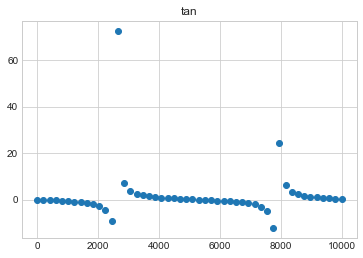

In [14]:
# Create plot
fig, ax = plt.subplots()

#transform your data with a numpy function
new_data = np.tan(pure)


#plot the newly retransformed graph
ax.scatter(pure, new_data)

#rename your grpah
ax.set_title('tan')

plt.show()


## Pandas 

In [15]:
import pandas as pd

### Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

<img src="series-and-dataframe.png" alt="drawing" width="600"/>


In [18]:
# help(pd.DataFrame);

## Creating a Dataframe

A dataframe can be created from many different types of data sources.  Below are diffeten examples of this.  

### Create from dictionaries

### Create a dataframe from a csv file

In [19]:
movies = pd.read_csv('IMDB-Movie-Data.csv')
movies.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


### Read CSV from weburl

*If you are doing this from git, make sure you have the url for the raw csv file*

In [12]:
pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


### Read in excel file

There is a file called `1617FedSchoolCodeList.xlsx` in this directory.Look up how to read an excel file into a dataframe and do it. 

In [20]:

pd.read_excel('1617FedSchoolCodeList.xlsx',index_col='ID')

,SchoolCode,SchoolName,Address,City,StateCode,ZipCode,Province,Country,PostalCode
ID,,,,,,,,,
25969,B04724,WIDENER UNIV SCHOOL OF LAW - DE,4601 CONCORD PIKE/PO BOX 7474,WILMINGTON,DE,19803,NaN,NaN,NaN
25970,B06171,CENTER FOR ADVANCED STUDIES OF PUER,BOX S-4467,SAN JUAN,PR,902,NaN,NaN,NaN
25971,B06511,PENTECOSTAL THEOLOGICAL SEMINARY,PO BOX 3330,CLEVELAND,TN,37320,NaN,NaN,NaN
25972,B07022,THE CHICAGO SCHOOL OF PROF PSYCHOLOGY,325 NORTH WELLS STREET,CHICAGO,IL,60610,NaN,NaN,NaN
25973,B07624,NATIONAL COLLEGE OF NATURAL MEDICINE,049 SW PORTER,PORTLAND,OR,97201,NaN,NaN,NaN
25974,B07625,OREGON COL OF ORIENTAL MEDICINE,10525 SE CHERRY BLOSSOM DR,PORTLAND,OR,97216,NaN,NaN,NaN
25975,B08041,ALFRED ADLER GRADUATE SCHOOL,1001 WEST HIGHWAY 7 SUITE 344,HOPKINS,MN,55305,NaN,NaN,NaN
25976,B08083,UNIV OF THE DIST OF COLU -SCHOOL OF LAW,4200 CONNECTICUT AVENUE NW,WASHINGTON,DC,20008,NaN,NaN,NaN
25977,B42154,GRACE SCHOOL OF THEOLOGY,3705 COLLEGE PARK DR,CONROE,TX,77384,NaN,NaN,NaN


### Create from  from json

In [21]:
import json
db = json.load(open('foods-2011-10-03.json'))
len(db)

6636

In [23]:
df = pd.DataFrame(db)
df.head()

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'description': '...","[{'amount': 1, 'unit': 'cup, crumbled', 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]


In [25]:
# pd.read_json('foods-2011-10-03.json')

In [26]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


## Familiarizing yourself with the DF

In [27]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [28]:
info.tail()

,description,group,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [32]:
#look at the columns attribute
print(info.columns)

Index(['description', 'group', 'id', 'manufacturer'], dtype='object')


In [33]:
#look at the shape attribute
info.shape

(6636, 4)

In [34]:
#understanding the different types of data for each column
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [37]:
#call on a specific column, can use .head and .tail on series

info['description']
pd.DataFrame(info['description']).head()
# info['description'].head()

,description
0,"Cheese, caraway"
1,"Cheese, cheddar"
2,"Cheese, edam"
3,"Cheese, feta"
4,"Cheese, mozzarella, part skim milk"


In [41]:
#get descriptive stats by columns
info.describe()

,id
count,6636.000000
mean,15733.055304
std,8715.095274
min,1008.000000
25%,10170.750000
50%,14445.000000
75%,19188.250000
max,93600.000000


***Why might .describe() return fewer that all summary stats across our columns?***

## Converting objects to a Series

In [42]:
my_list = [1,2,3,4,5]
my_numpy_array = np.array([1,2,3,4,5])

In [43]:
my_list_ser = pd.Series(my_list)

In [44]:
my_list_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [45]:
my_numpy_array_ser = pd.Series(my_numpy_array)

In [46]:
my_numpy_array_ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [48]:
type(my_list_ser) == type(my_numpy_array_ser)

True

In [49]:
# You can convert a series to a DF for easier viewing. 
# Notice that the column header is automatically assigned.

pd.DataFrame(my_numpy_array_ser)

,0
0,1
1,2
2,3
3,4
4,5


## Converting objects to DataFrames

In [50]:
# You can use a dict
my_dict = {'my_column_name': ['my', 'column', 'elements', 'go', 'here']}

In [51]:
my_dict_df = pd.DataFrame(my_dict)

In [52]:
my_dict_df

,my_column_name
0,my
1,column
2,elements
3,go
4,here


In [55]:
# You can also use a list of lists, or an array of arrays
headers = ['my', 'column', 'headers']
list_of_lists = [['col_1_val_1', 'col_2_val_1', 'col_3_val_1'],
               ['col_1_val_2', 'col_2_val_2', 'col_3_val_2'],
               ['col_1_val_3', 'col_2_val_3', 'col_3_val_3']]

In [57]:
pd.DataFrame(list_of_lists, columns = headers)

,my,column,headers
0,col_1_val_1,col_2_val_1,col_3_val_1
1,col_1_val_2,col_2_val_2,col_3_val_2
2,col_1_val_3,col_2_val_3,col_3_val_3


In [58]:
#define a ditionary containing employee data
data1 = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 

In [61]:
#Convert the dictionary into DataFrame 
# df1 = pd.DataFrame(data1,index=[0, 1, 2, 3])
df1 = pd.DataFrame(data1)
df1

,Address,Age,Mobile No,Name,Qualification
0,Nagpur,27,97,Jai,Msc
1,Kanpur,24,91,Princi,MA
2,Allahabad,22,58,Gaurav,MCA
3,Kannuaj,32,76,Anuj,Phd


### Combining Data Frames

In [62]:
#create a second data frame of employee data to merge the two 
data2 = {'Name':['Gaurav', 'Anuj', 'Dhiraj', 'Hitesh'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 

df2 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
df2.head()

,Address,Age,Name,Qualification,Salary
2,Allahabad,22,Gaurav,MCA,1000
3,Kannuaj,32,Anuj,Phd,2000
6,Allahabad,12,Dhiraj,Bcom,3000
7,Kannuaj,52,Hitesh,B.hons,4000


In [63]:
df1

,Address,Age,Mobile No,Name,Qualification
0,Nagpur,27,97,Jai,Msc
1,Kanpur,24,91,Princi,MA
2,Allahabad,22,58,Gaurav,MCA
3,Kannuaj,32,76,Anuj,Phd


#### Concatenating Dataframes

First argument in pd.concat takes a `list`!!

Axis = 0 stacks DFs on top of each other
Axis = 1 combines DFs side by side

In [69]:
pd.concat([df1, df2], axis=0)

,Address,Age,Mobile No,Name,Qualification,Salary
0,Nagpur,27,97.0,Jai,Msc,NaN
1,Kanpur,24,91.0,Princi,MA,NaN
2,Allahabad,22,58.0,Gaurav,MCA,NaN
3,Kannuaj,32,76.0,Anuj,Phd,NaN
2,Allahabad,22,NaN,Gaurav,MCA,1000.0
3,Kannuaj,32,NaN,Anuj,Phd,2000.0
6,Allahabad,12,NaN,Dhiraj,Bcom,3000.0
7,Kannuaj,52,NaN,Hitesh,B.hons,4000.0


In [42]:
pd.concat([df1, df2], sort=True, axis=1)

,Name,Age,Address,Qualification,Mobile No,Name,Age,Address,Qualification,Salary
0,Jai,27.0,Nagpur,Msc,97.0,NaN,NaN,NaN,NaN,NaN
1,Princi,24.0,Kanpur,MA,91.0,NaN,NaN,NaN,NaN,NaN
2,Gaurav,22.0,Allahabad,MCA,58.0,Gaurav,22.0,Allahabad,MCA,1000.0
3,Anuj,32.0,Kannuaj,Phd,76.0,Anuj,32.0,Kannuaj,Phd,2000.0
6,NaN,NaN,NaN,NaN,NaN,Dhiraj,12.0,Allahabad,Bcom,3000.0
7,NaN,NaN,NaN,NaN,NaN,Hitesh,52.0,Kannuaj,B.hons,4000.0


#### Merging Dataframes

<img src="joinimages.png" alt="drawing" width="550"/>


In [72]:
df1

,Address,Age,Mobile No,Name,Qualification
0,Nagpur,27,97,Jai,Msc
1,Kanpur,24,91,Princi,MA
2,Allahabad,22,58,Gaurav,MCA
3,Kannuaj,32,76,Anuj,Phd


In [73]:
df2

,Address,Age,Name,Qualification,Salary
2,Allahabad,22,Gaurav,MCA,1000
3,Kannuaj,32,Anuj,Phd,2000
6,Allahabad,12,Dhiraj,Bcom,3000
7,Kannuaj,52,Hitesh,B.hons,4000


In [71]:
pd.merge(df1, df2, how='inner')

,Address,Age,Mobile No,Name,Qualification,Salary
0,Allahabad,22,58,Gaurav,MCA,1000
1,Kannuaj,32,76,Anuj,Phd,2000


In [44]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

By calling the merge function on multiple dataframes without any specifications, it tries its best to merge them. It will assess any column that they find to be identical and use those as the merge.

In [74]:
pd.merge(df1, df2, how='inner')

,Address,Age,Mobile No,Name,Qualification,Salary
0,Allahabad,22,58,Gaurav,MCA,1000
1,Kannuaj,32,76,Anuj,Phd,2000


If we want to keep all data we should do an outer join

In [75]:
pd.merge(df1, df2, how='outer')

,Address,Age,Mobile No,Name,Qualification,Salary
0,Nagpur,27,97.0,Jai,Msc,NaN
1,Kanpur,24,91.0,Princi,MA,NaN
2,Allahabad,22,58.0,Gaurav,MCA,1000.0
3,Kannuaj,32,76.0,Anuj,Phd,2000.0
4,Allahabad,12,NaN,Dhiraj,Bcom,3000.0
5,Kannuaj,52,NaN,Hitesh,B.hons,4000.0


If you are only concerned with data from one table, then you can specify that table is what you want to merge on.  

In [76]:
pd.merge(df1, df2, how='right')

,Address,Age,Mobile No,Name,Qualification,Salary
0,Allahabad,22,58.0,Gaurav,MCA,1000
1,Kannuaj,32,76.0,Anuj,Phd,2000
2,Allahabad,12,NaN,Dhiraj,Bcom,3000
3,Kannuaj,52,NaN,Hitesh,B.hons,4000


Sometimes you want to be specific in which columns you want the dataframe to merge on

In [77]:
pd.merge(df1, df2, how='right', on=['Name', 'Age'])

,Address_x,Age,Mobile No,Name,Qualification_x,Address_y,Qualification_y,Salary
0,Allahabad,22,58.0,Gaurav,MCA,Allahabad,MCA,1000
1,Kannuaj,32,76.0,Anuj,Phd,Kannuaj,Phd,2000
2,NaN,12,NaN,Dhiraj,NaN,Allahabad,Bcom,3000
3,NaN,52,NaN,Hitesh,NaN,Kannuaj,B.hons,4000


## Data transformation

### Removing duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:


In [78]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [79]:
# method that returns a boolean Series indicating whether each row 
# is a duplicate or not
data[data.duplicated()]

data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


If I call `data` again why are there still duplicates?

In [80]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [52]:
data.drop_duplicates(inplace=True)
data

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [81]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

#we are adding another column to help us understand which row was dropped
data['v1'] = range(7)

data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [82]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [83]:

data.drop_duplicates(['k1'], keep='last')

,k1,k2,v1
2,one,2,2
6,two,4,6


In [85]:
myData = data.drop_duplicates(['k1'], keep='last')

### Notice that the index values are no longer incremented evenly by 1
#### df.reset_index() is your friend. More useful applications of reset_index() coming soon!

In [86]:
myData.reset_index()

,index,k1,k2,v1
0,2,one,2,2
1,6,two,4,6


## Examining different parts of the data frame

In [93]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')
movies_df.head()
movies_indexed = movies_df.reset_index()
movies_indexed.head()


,Title,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### There are a few different ways to select data from a dataframe

In [88]:
# Returns a series
movies_df['Rank'].head()

Title
Guardians of the Galaxy    1
Prometheus                 2
Split                      3
Sing                       4
Suicide Squad              5
Name: Rank, dtype: int64

In [89]:
# Returns a dataframe
movies_df[['Rank']].head()

,Rank
Title,
Guardians of the Galaxy,1
Prometheus,2
Split,3
Sing,4
Suicide Squad,5


Now we'll look at getting data by rows.

For rows, we have two options:

- .loc - locates by name
- .iloc- locates by numerical index

Remember that we are still indexed by movie Title, so to use .loc we give it the Title of a movie:



In [94]:
movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [100]:
# use loc to find the row by name
prom = movies_df.loc["Prometheus"]

prom

Rank                                                                  2
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                                7
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                            65
Name: Prometheus, dtype: object

In [103]:
#use iloc to find the row by numerical index

prom = movies_df.iloc[1,]
prom


Rank                                                                  2
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                                7
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                            65
Name: Prometheus, dtype: object

`loc` and `iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.


How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [104]:
movies_df.loc['Prometheus':'Sing']



,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [105]:
mov_df = movies_df.loc['Prometheus':'Sing']
mov_df

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [106]:
# Note that we can use reset_index() to filter upon a numerical index as opposed to a string index
movies_df_reindexed = movies_df.reset_index()
movies_df_reindexed.head()

,Title,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [107]:
# Now we can index by integer values
movies_df_reindexed.iloc[1:4]

,Title,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [108]:
movies_df.iloc[1:4]



,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


## Deep Copy vs. Shallow Copy

In [109]:
#make a copy of the dataframe. 
testing = movies_df
testing.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [68]:
#change the values for one column
testing['Director'] = 'SeanAbu'
testing.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,SeanAbu,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",SeanAbu,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


***Let's look back at the origianl dataframe***

In [110]:
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


We created a shallow copy of the dataframe.  What does that mean?


In [111]:
# Note you can run .copy on a df and a series
s = pd.Series([1, 2], index=["a", "b"])
deep = s.copy(deep=True)
shallow = s.copy(deep=False)

Shallow copy shares data and index with original.

In [71]:
s is shallow


False

In [72]:
s.values is shallow.values and s.index is shallow.index


True

Deep copy has own copy of data and index.

In [73]:
s is deep

False

In [74]:
s.values is deep.values or s.index is deep.index

False

Updates to the data shared by shallow copy and original is reflected in both; deep copy remains unchanged.

In [75]:
s[0] = 3
shallow[1] = 4

In [76]:
s

a    3
b    4
dtype: int64

In [77]:
shallow

a    3
b    4
dtype: int64

In [78]:
deep

a    1
b    2
dtype: int64

## Conditional selections


For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [112]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

### In Pandas

In [113]:
condition = (movies_df['Director'] == "Ridley Scott")

condition

Title
Guardians of the Galaxy                    False
Prometheus                                  True
Split                                      False
Sing                                       False
Suicide Squad                              False
The Great Wall                             False
La La Land                                 False
Mindhorn                                   False
The Lost City of Z                         False
Passengers                                 False
Fantastic Beasts and Where to Find Them    False
Hidden Figures                             False
Rogue One                                  False
Moana                                      False
Colossal                                   False
The Secret Life of Pets                    False
Hacksaw Ridge                              False
Jason Bourne                               False
Lion                                       False
Arrival                                    False
Gold          

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [114]:
movies_df[condition]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [82]:
movies_df[movies_df['Director'] == "Ridley Scott"]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


**Find how many movies were directed by Christopher Nolan.**


In [115]:
#put your code here

movies_df[movies_df['Director'] == "Christopher Nolan"]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0


Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:



In [116]:
movies_df[movies_df['Rating'] >= 8.8]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


We can make some richer conditionals by using logical operators: 
- `|`    for "or"  
- `&`    for "and"


Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [117]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


** Find all of the movies by a Christopher Nolan that have a score of 8.7 or better**

In [118]:
# your code here

movies_df[(movies_df['Director'] == 'Christopher Nolan') & (movies_df['Metascore'] >= 8.7)]


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0


Using the `isin()` method we could make this more concise though:

In [119]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Using `~` flips your booleans and allows you to find the inverse of your query.  

In [120]:
movies_df[~movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0


There is also a [Dataframe.query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method that allows you to perform these conditional selections.  

In [129]:
movies_df.query('Year >= 2010').head()


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [130]:
movies_df.query('Director == "Christopher Nolan" | Director == "Ridley Scott"')


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


## Applied Question: 

Which group of movies has the higher average revenue those with a rating of above 8, or those with at least 300,000 reviews?

In [14]:
# Subset the dataframe to find movies with a rating above 8.


In [13]:
# Find the average revenue of that group.


In [12]:
# Subset the dataframe to find movies with more than 300,000 votes.


In [11]:
# find the average of that group


In [10]:
# compare the two groups' mean revenue
